In [39]:
import warnings
warnings.filterwarnings("ignore") # Suppress warnings for these docs
import os
from access_nri_intake.source.builders import AccessOm3Builder
import matplotlib.pyplot as plt

In [2]:
output_path = '/g/data/tm70/ml0072/COMMON/git_repos/Expts_manager/Expts_manager_test2/ctrl_expts-tracer_timesteps/expt1/archive'
!ls {output_path}

intake_esm_ds.csv.gz  output000  output003   restart001  restart004
intake_esm_ds.json    output001  output004   restart002
metadata.yaml	      output002  restart000  restart003


In [3]:
! conda env list | grep "*"

base                  *  /g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04


In [4]:
from access_nri_intake.source import builders
from access_nri_intake.catalog.manager import CatalogManager
from dask.distributed import Client

In [5]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 251.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42499,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 251.19 GiB
Comm: tcp://127.0.0.1:39855,Total threads: 4
Dashboard: /proxy/44605/status,Memory: 35.88 GiB
Nanny: tcp://127.0.0.1:33347,


In [6]:
print(dir(builders)[:6])

['AccessCm2Builder', 'AccessEsm15Builder', 'AccessOm2Builder', 'AccessOm3Builder', 'BaseBuilder', 'Builder']


In [7]:
%%time
builder = builders.AccessOm3Builder(
    path= output_path
)

CPU times: user 3.39 ms, sys: 0 ns, total: 3.39 ms
Wall time: 3.4 ms


In [8]:
builder.build()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/access_nri_intake/source/utils.py:37: UserWarning: Time coordinate does not include bounds information. Guessing start and end times.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/access_nri_intake/source/utils.py:37: UserWarning: Time coordinate does not include bounds information. Guessing start and end times.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/access_nri_intake/source/utils.py:37: UserWarning: Time coordinate does not include bounds information. Guessing start and end times.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/access_nri_intake/source/utils.py:37: UserWarning: Time coordinate does not include bounds information. Guessing start and end times.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/

AccessOm3Builder(paths=['/g/data/tm70/ml0072/COMMON/git_repos/Expts_manager/Expts_manager_test2/ctrl_expts-tracer_timesteps/expt1/archive'], storage_options={}, depth=2, exclude_patterns=['*restart*', '*MOM_IC.nc', '*ocean_geometry.nc', '*ocean.stats.nc', '*Vertical_coordinate.nc'], include_patterns=['*.nc'], joblib_parallel_kwargs={'n_jobs': 56})

In [9]:
builder.invalid_assets

""


In [10]:
builder.save(name='test_intake_datastore', description='test', directory=output_path)

Successfully wrote ESM catalog json file to: file:///g/data/tm70/ml0072/COMMON/git_repos/Expts_manager/Expts_manager_test2/ctrl_expts-tracer_timesteps/expt1/archive/test_intake_datastore.json


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

tool_dir = '/g/data/tm70/ml0072/COMMON/git_repos/fork_access-eval-recipes/ml_create_own_datastore'
sys.path.append(tool_dir)
from common_functions import _expt_name_combo, _read_ryaml, plot_time_series_combo, plot_time_series_combo2

yamlfile_path = os.path.join(tool_dir,'Expts_manager.yaml')
yaml_input = _read_ryaml(yamlfile_path)
MOM_contrl_dir = yaml_input['base_dir_name']
contrl_name = 'DT_THERM_1800_DIABATIC_FIRST_True_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_0'

MOM_expt_dir1 = yaml_input['namelists']['MOM_input']['MOM_expt_dir1']
MOM_list1_combo = yaml_input['namelists']['MOM_input']['MOM_list1_combo']
expt_names = _expt_name_combo(MOM_list1_combo)

MOM_dirs = [MOM_contrl_dir]+list(MOM_expt_dir1)
print(MOM_dirs)
MOM_names = [contrl_name] + list(expt_names)
print(MOM_names)

Matplotlib is building the font cache; this may take a moment.


['Ctrl-1deg_jra55do_ryf', 'expt1', 'expt2', 'expt3', 'expt4', 'expt5', 'expt6', 'expt8', 'expt10']
['DT_THERM_1800_DIABATIC_FIRST_True_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_0', 'DT_THERM_1800_DIABATIC_FIRST_True_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_1800', 'DT_THERM_1800_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_1800', 'DT_THERM_3600_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_3600', 'DT_THERM_7200_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_7200', 'DT_THERM_9000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_9000', 'DT_THERM_10800_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_10800', 'DT_THERM_14400_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_14400', 'DT_THERM_18000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_18000']


In [3]:
from intake import open_esm_datastore

In [4]:
output_expt_path = '/g/data/tm70/ml0072/COMMON/git_repos/Expts_manager/ctrl_expts-tracer_timesteps'
intake_esm_ds = 'intake_esm_ds.json'
MOM_dirs

['Ctrl-1deg_jra55do_ryf',
 'expt1',
 'expt2',
 'expt3',
 'expt4',
 'expt5',
 'expt6',
 'expt8',
 'expt10']

In [5]:
datastore_tot = []
for i in MOM_dirs[:4]:
    print(i)
    datastore_path = os.path.join(f"{output_expt_path}",f"{i}","archive",intake_esm_ds)
    datastore = open_esm_datastore(datastore_path,columns_with_iterables=["variable"])
    datastore_tot.append(datastore)

output_expt_path = '/g/data/tm70/ml0072/COMMON/git_repos/Expts_manager/Expts_manager_test/ctrl_expts-tracer_timesteps_test'
for i in MOM_dirs[4:]:
    print(i)
    datastore_path = os.path.join(f"{output_expt_path}",f"{i}","archive",intake_esm_ds)
    datastore = open_esm_datastore(datastore_path,columns_with_iterables=["variable"])
    datastore_tot.append(datastore)
datastore_tot

Ctrl-1deg_jra55do_ryf
expt1
expt2
expt3
expt4
expt5
expt6
expt8
expt10


[<intake_esm_ds catalog with 944 dataset(s) from 1209 asset(s)>,
 <intake_esm_ds catalog with 2354 dataset(s) from 3090 asset(s)>,
 <intake_esm_ds catalog with 2354 dataset(s) from 3090 asset(s)>,
 <intake_esm_ds catalog with 2354 dataset(s) from 3063 asset(s)>,
 <intake_esm_ds catalog with 48 dataset(s) from 166 asset(s)>,
 <intake_esm_ds catalog with 48 dataset(s) from 166 asset(s)>,
 <intake_esm_ds catalog with 48 dataset(s) from 166 asset(s)>,
 <intake_esm_ds catalog with 48 dataset(s) from 166 asset(s)>,
 <intake_esm_ds catalog with 48 dataset(s) from 166 asset(s)>]

In [6]:
MOM_names

['DT_THERM_1800_DIABATIC_FIRST_True_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_0',
 'DT_THERM_1800_DIABATIC_FIRST_True_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_1800',
 'DT_THERM_1800_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_False_DTBT_RESET_PERIOD_1800',
 'DT_THERM_3600_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_3600',
 'DT_THERM_7200_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_7200',
 'DT_THERM_9000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_9000',
 'DT_THERM_10800_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_10800',
 'DT_THERM_14400_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_14400',
 'DT_THERM_18000_DIABATIC_FIRST_False_THERMO_SPANS_COUPLING_True_DTBT_RESET_PERIOD_18000']

In [7]:
datastore_tmp.keys()
dataset_dict.keys()

NameError: name 'datastore_tmp' is not defined

In [8]:
var = 'thetaoga'
datastore_tmp = datastore_tot[0].search(variable=var).to_dask()
dataset_dict = datastore_tmp.to_dataset_dict(progressbar=False)
dataset = dataset_dict[next(iter(dataset_dict))]

ValueError: Expected exactly one dataset. Received 10 datasets. Please refine your search or use `.to_dataset_dict()`.

NameError: name 'plt' is not defined

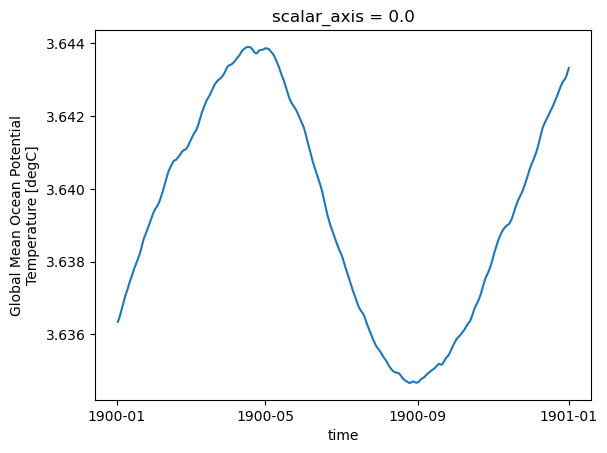

In [16]:
dataset_dict['access_om3_mom6_scalar_1day_1900.1day'][var].plot(label = MOM_names[0])
plt.title(f"Comparison of {var}")
plt.legend(loc='best')
plt.grid()

In [9]:
indices = [0,1]
var = 'thetaoga'
for i in indices:
    datastore_tmp = datastore_tot[i].search(variable=var)
    dataset_dict = datastore_tmp.to_dataset_dict(progressbar=False)
    dataset = dataset_dict[next(iter(dataset_dict))]
    data = set_time_range(dataset, var, time_range)
    data.plot(label = MOM_names[i],
                     linestyle = line_style[i%len(line_style)],
                     color = line_color[i%len(line_color)],
                     marker = line_marker[i%len(line_marker)])
if ylims is not None:
    plt.ylim(ylims)
plt.title(f"Comparison of {var}")
plt.legend(loc='best')
plt.grid()

plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)
plt.xlabel(plt.gca().get_xlabel(), fontsize=label_fontsize)
plt.ylabel(plt.gca().get_ylabel(), fontsize=label_fontsize)

NameError: name 'set_time_range' is not defined

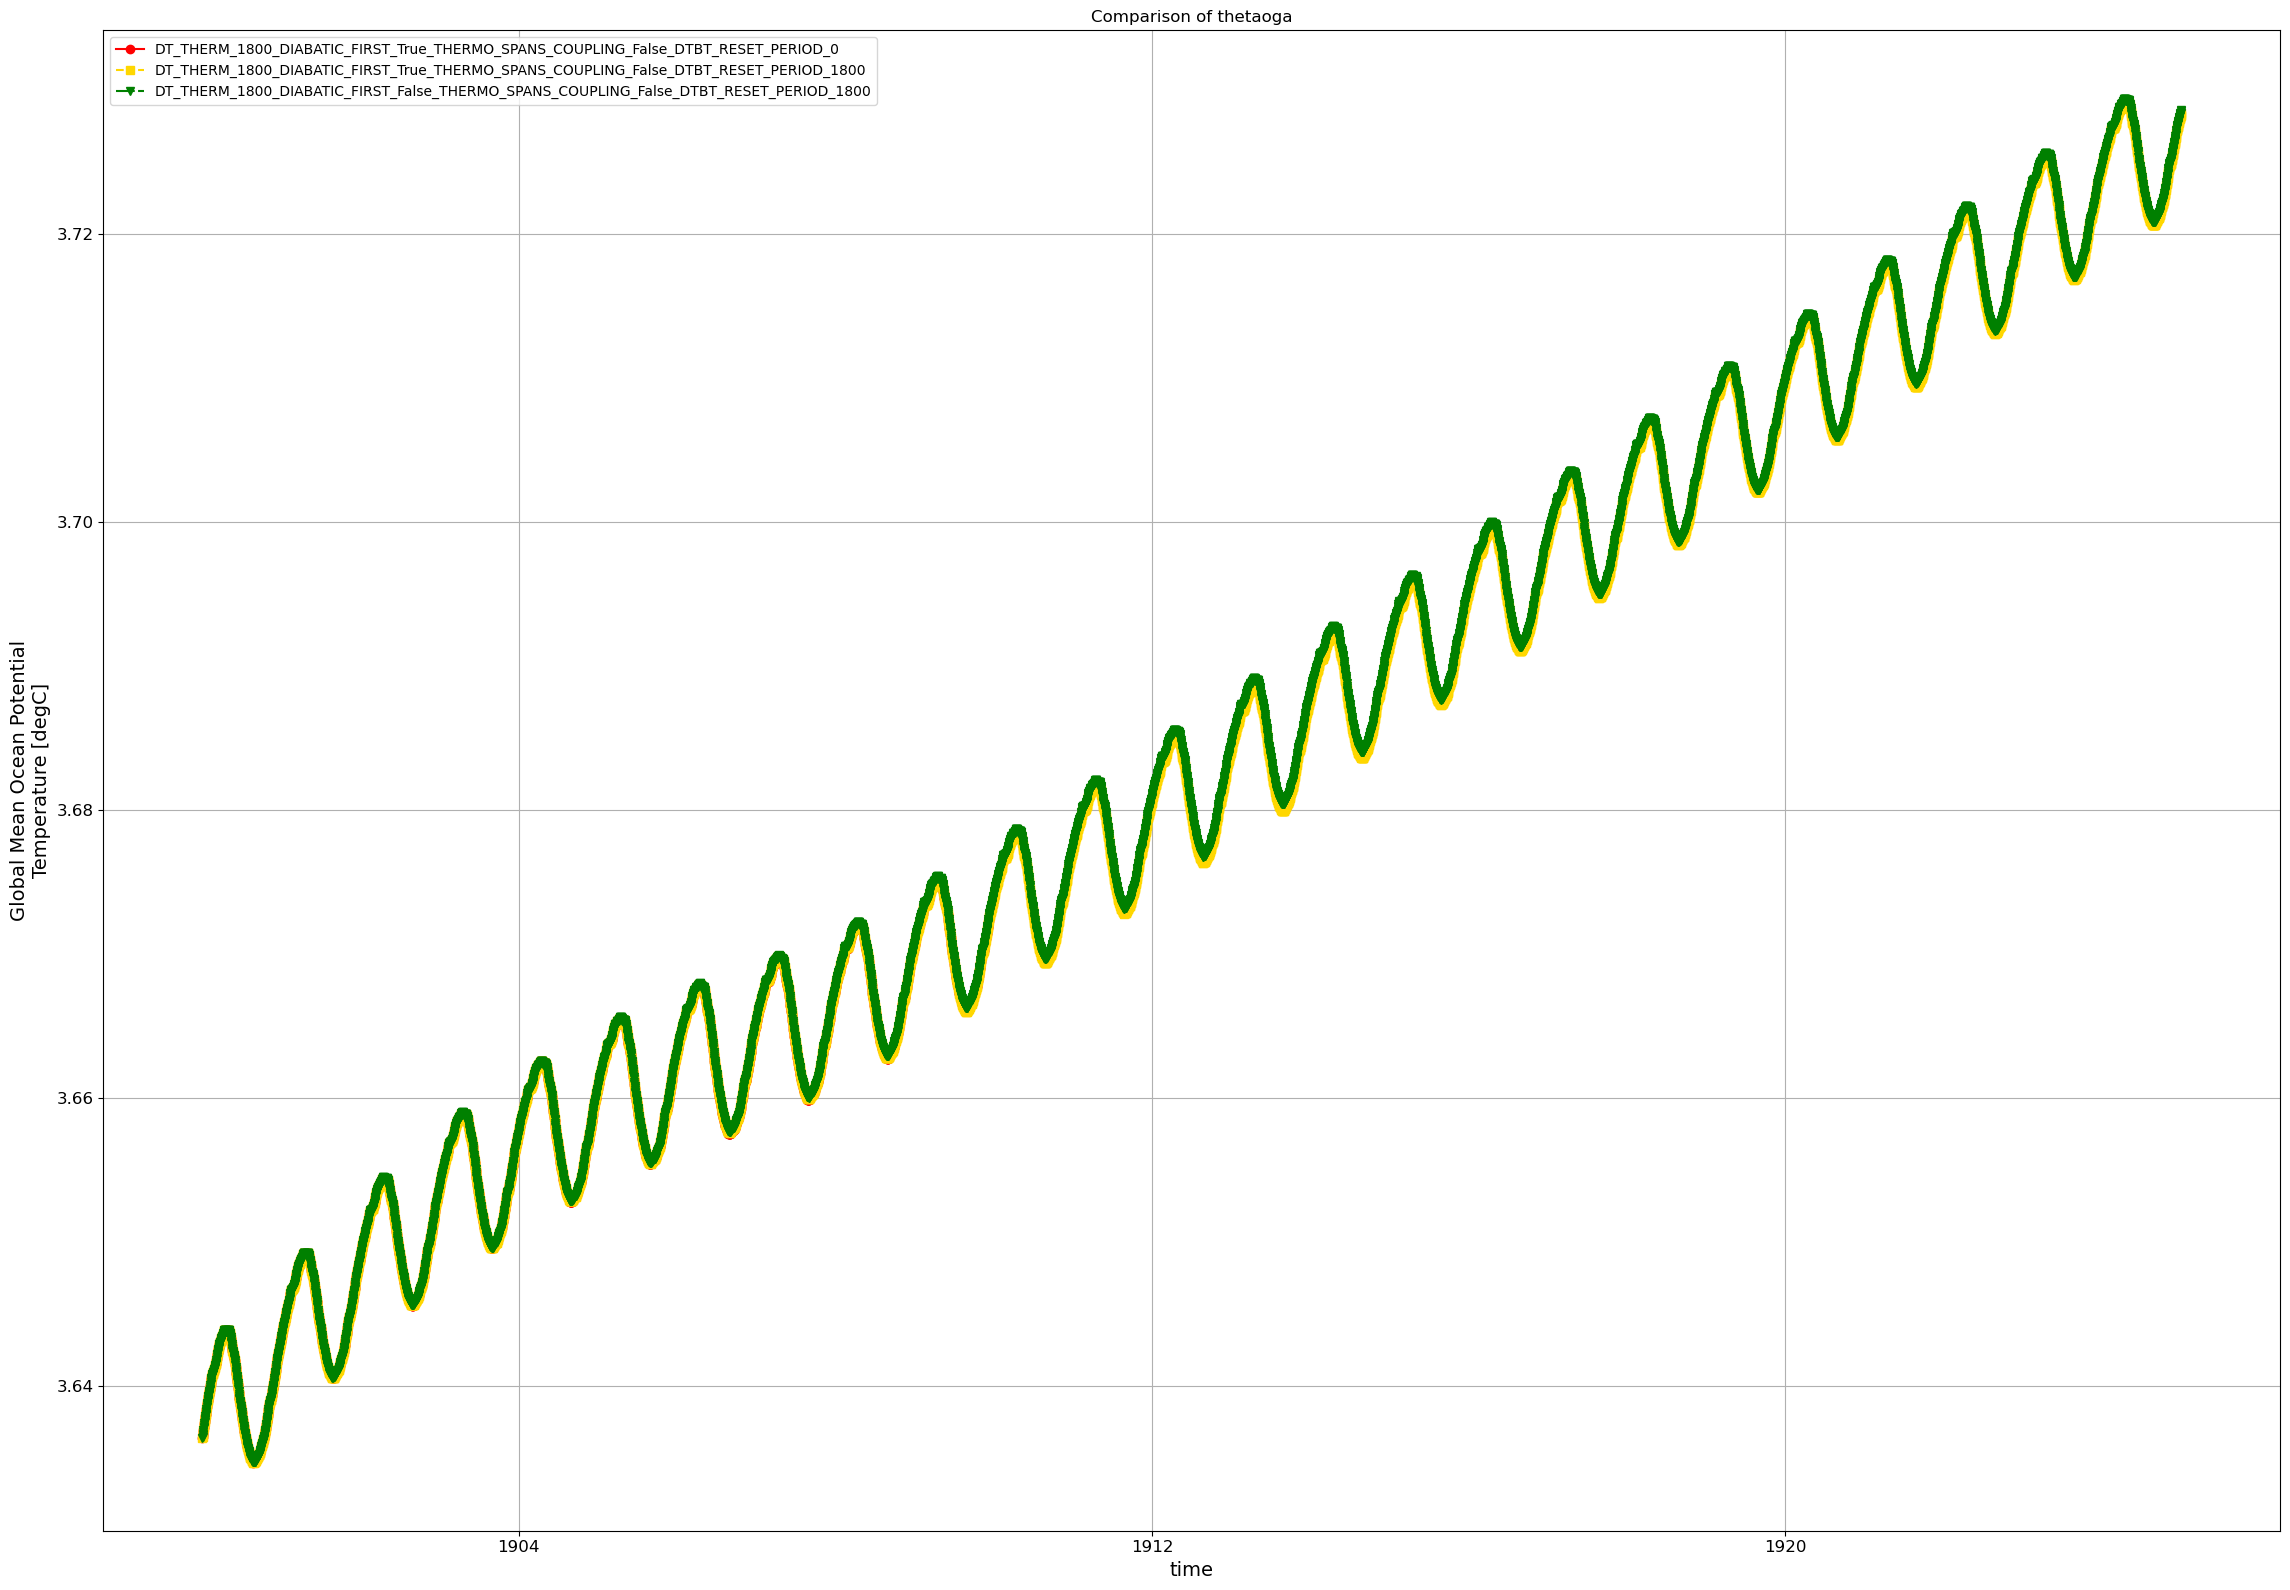

In [10]:
var = 'thetaoga'
line_style = ['-','--','-.',':']
line_color = ['red','gold','green','pink','cyan','black','purple','blue','gray']
line_marker = ['o','s','v' ,'d']
time_range = ('1900-01-01','1900-01-15')
time_range = None
plot_time_series_combo2(datastore_tot,MOM_names,var,indices=[0,1,2],
                      line_style=line_style,
                      line_color=line_color,
                      line_marker=line_marker,
                      figsize=(23,16),time_range=time_range)

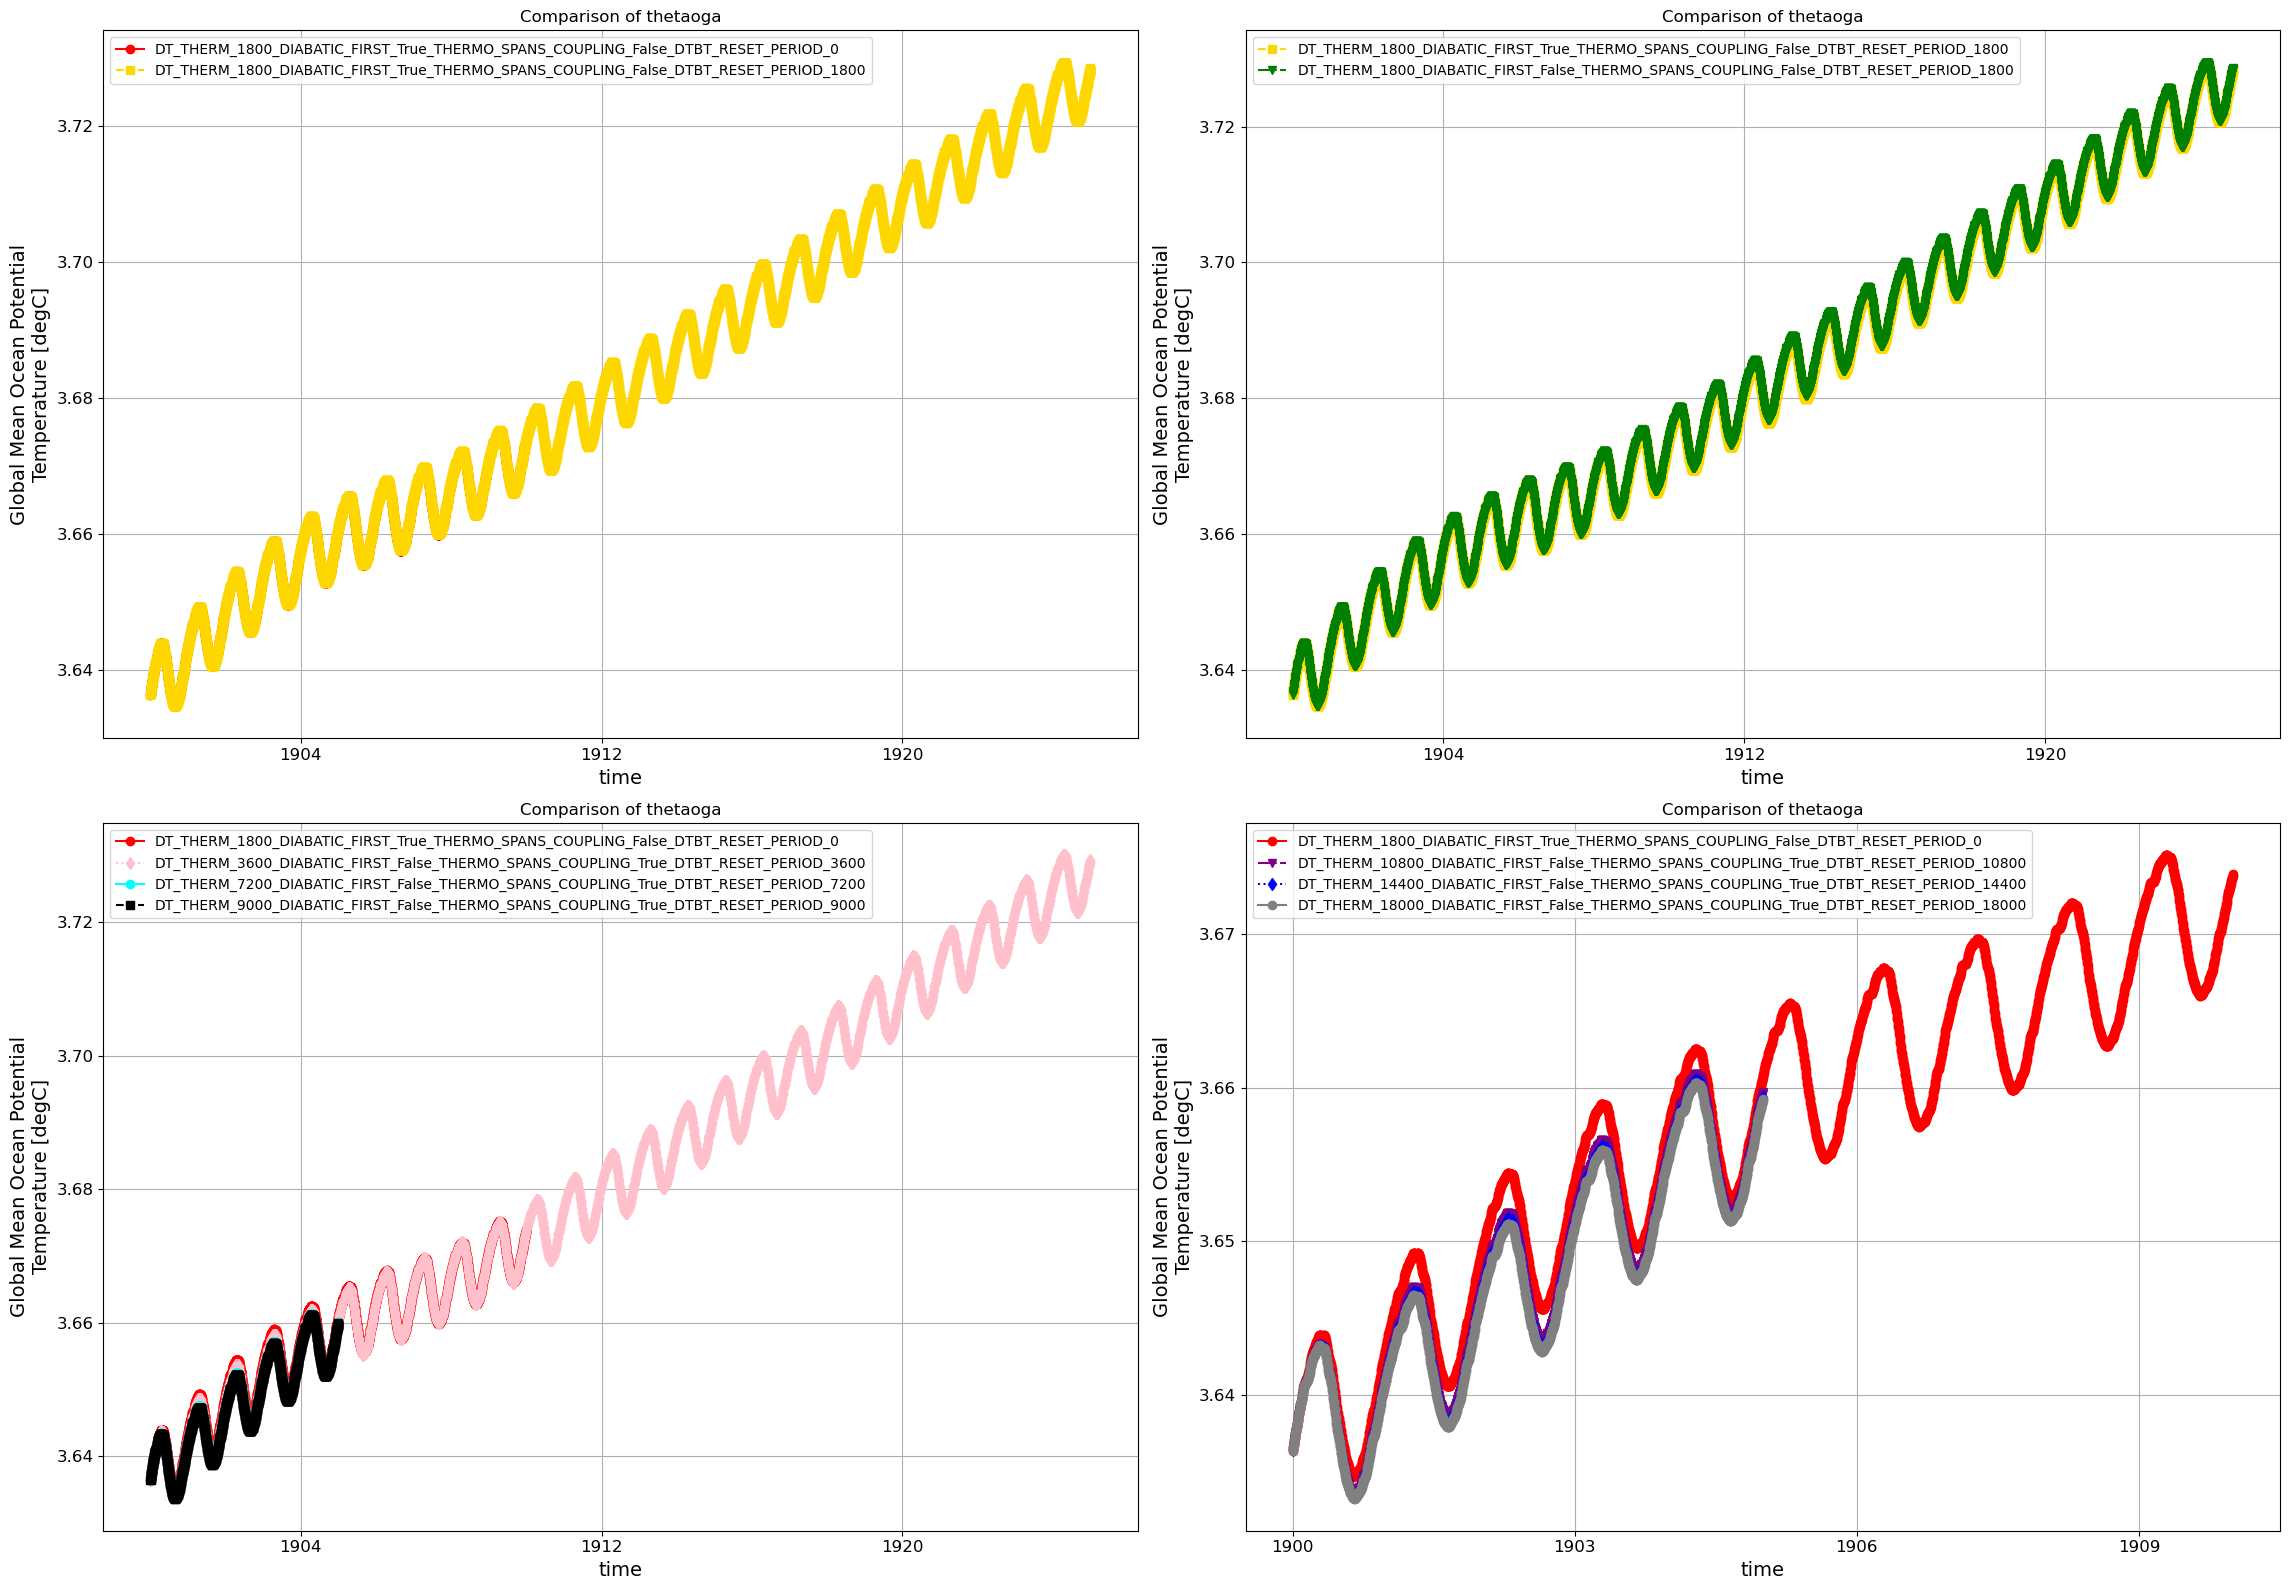

In [11]:
var = 'thetaoga'
line_style = ['-','--','-.',':']
line_color = ['red','gold','green' ,'pink','cyan','black','purple','blue','gray']
line_marker = ['o','s','v' ,'d']
subplots = [{'indices': [0, 1], 'subplot': (2, 2, 1), 'title': 'DTBT_RESET_PERIOD', 'difference': None},  
            {'indices': [1, 2], 'subplot': (2, 2, 2), 'title': 'DIABATIC_FIRST'   , 'difference': None},
            {'indices': [0, 3, 4, 5], 'subplot': (2, 2, 3), 'title': 'DT_THERM', 'difference': None, 'legend_loc': 'upper left'},  
            {'indices': [0, 6, 7, 8], 'subplot': (2, 2, 4), 'title': 'DT_THERM'   , 'difference': None, 'legend_loc': 'upper left'},
           ]
#time_range = ('1900-01-01','1904-12-31')
time_range = None
plot_time_series_combo2(datastore_tot,MOM_names,var,
                      line_style=line_style,
                      line_color=line_color,
                      line_marker=line_marker,
                      figsize=(23,16),subplots=subplots,time_range=time_range)

KeyError: 'thetaoga'

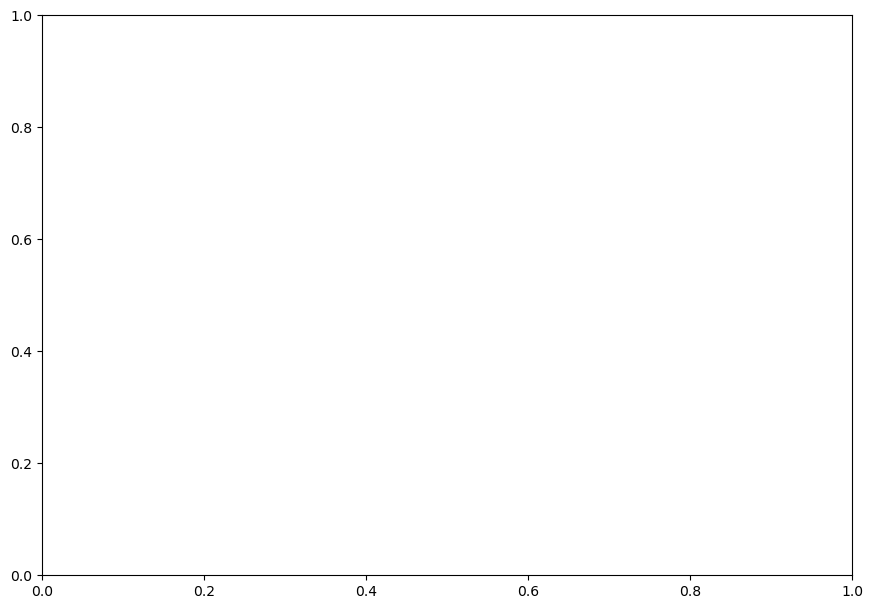

In [46]:
var = 'thetaoga'
line_style = ['-','--','-.',':']
line_color = ['red','blue' ,'lightgreen' ,'magenta']
line_marker = ['o','s','v' ,'d']
subplots = [{'indices': [0, 1], 'subplot': (2, 2, 1), 'title': 'DTBT_RESET_PERIOD', 'difference': 0},  
            {'indices': [1, 2], 'subplot': (2, 2, 2), 'title': 'DIABATIC_FIRST'   , 'difference': 1},
            {'indices': [0, 3, 4, 5], 'subplot': (2, 2, 3), 'title': 'DT_THERM', 'difference': 0, 'legend_loc': 'upper left'},  
            {'indices': [0, 6, 7, 8], 'subplot': (2, 2, 4), 'title': 'DT_THERM'   , 'difference': 0, 'legend_loc': 'upper left'},
           ]
time_range = ('1900-01-01','1900-01-15')
time_range = None
plot_time_series_combo2(datastore_tot,MOM_names,var,
                      line_style=line_style,
                      line_color=line_color,
                      line_marker=line_marker,
                      figsize=(23,16),subplots=subplots,time_range=time_range)